# 1. 복습하기

* 학습 데이터 세트와 테스트 데이터 세트를 분리하는 함수는? ( train_test_split )

* 의사결정 트리의 장점과 단점은? ( 특성을 알기 쉽지만, 과대적합 되기 쉽다 )

* 과소적합이란? ( 너무 안 맞는 것 )

* 과대적합이란? ( 테스트셋에 너무 맞는 것 )

* 의사결정 트리 알고리즘을 분류에 적용할 때 사용하는 클래스는? ( DecisionTreeClassifier )

* 훈련 데이터 세트로 학습할 때 사용하는 메소드는? ( fit )

* 테스트 데이터 세트로 예측할 때 사용하는 메소드는? ( predict )


In [ ]:
# 사이킷런 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# 복습하기
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=11,
)
dt = DecisionTreeClassifier(random_state=11)
dt.fit(X_train, y_train)
# 훈련용 데이터, 테스트 데이터 평가
dt.score(X_train, y_train)
dt.score(X_test, y_test)

0.9333333333333333

# 2. 과대적합 막기
* 결정트리에서는 과대적합을 막기 위해 가지치기를 할 수 있습니다.
* [max_depth](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) 매개변수를 3으로 조정해 봅시다.
* ( 하이퍼 파라미터 ) : 모델이 학습할 수 없어 사용자가 지정해야 하는 파라미터

In [ ]:
# max_depth=3 설정
dt = DecisionTreeClassifier(max_depth=3, random_state=11)
dt.fit(X_train, y_train)
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.975
0.9333333333333333


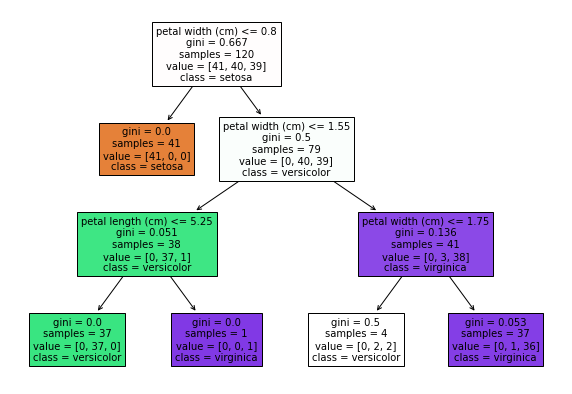

In [ ]:
# 트리 그래프 그리기
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt,
          class_names=iris.target_names,     
          feature_names=iris.feature_names,
          filled=True)
plt.show()

* max_depth의 값을 계속 바꿔가면서 테스트를 하면 무엇이 문제일까요? ( 테스트로 평가하는 것은 마지막에 한번만 해야 한다. )

* 테스트 세트로 일반화 성능을 올바르게 예측하려면 모델을 만들고 나서 마지막에 딱 한번만 사용해야 합니다.

* 그렇다면 매개변수를 사용한 하이퍼파라미터 튜닝은 어떻게 할 수 있을까요? ( 훈련 데이터를 하이퍼파라미터용으로 따로 나눈다 - 검증 데이터 셋 )


# 3. 검증 데이터 세트

* 테스트 데이터를 사용하지 않고 모델을 평가하는 방법은 훈련 데이터 세트를 ( 검증 ) 데이터 세트로 또 나누면 됩니다.

* 전체 데이터의 20%를 ( 테스트 ) 데이터로 사용하고, 나머지 80%인 ( 훈련 ) 데이터 중 다시 80%를 ( 훈련 ) 데이터로, 나머지 20%를 ( 검증 ) 데이터로 사용합니다.

* 훈련/검증 세트로 좋은 모델을 만들어 낸 후 최종적으로 한 번도 공개된 적 없는 ( 테스트 ) 데이터 세트로 단 한번의 예측 테스트를 진행합니다.

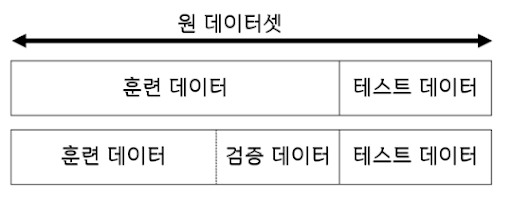

* 그러나, 데이터가 충분하지 않아 검증 세트를 나누기도 아깝다면?

## 3-1. 교차 검증 (Cross Validation)

* ( Cross Validation, CV )은 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것입니다. 이를 통해 하이퍼 파라미터 튜닝 등의 모델 최적화를 손쉽게 할 수 있습니다.

* ( K-폴드 ) 교차 검증 : 교차 검증의 가장 보편적인 방법으로 k개의 데이터 폴드 세트를 만들어서 k번 만큼 각 세트에서 학습과 검증 평가를 반복적으로 수행하여 이 점수를 평균하여 최종 검증 점수를 얻습니다.

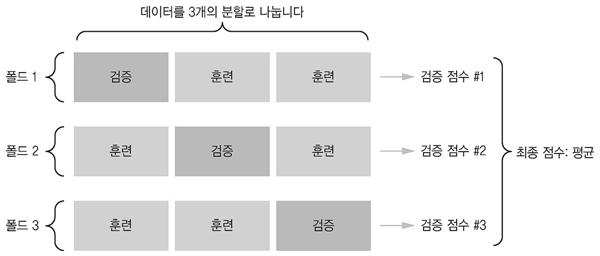

In [ ]:
# 교차검증 수행하기 (디폴트 : 5-폴드 교차검증)
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, X_train, y_train)  # cv=10
scores

{'fit_time': array([0.00084543, 0.00064635, 0.0006125 , 0.00061321, 0.00061417]),
 'score_time': array([0.00032902, 0.00025749, 0.00030971, 0.00023794, 0.00023341]),
 'test_score': array([0.91666667, 0.91666667, 1.        , 0.95833333, 1.        ])}

In [ ]:
# 교차 검증 점수
import numpy as np
np.mean(scores['test_score'])

0.9583333333333333

* 이제 교차 검증도 배웠으니, 결정트리의 매개변수 값을 바꿔가며 가장 성능이 좋은 모델을 찾아볼까요?

* 헉, 그런데 알고리즘마다 바꿔야 할 매개변수도 너무 많네요. 게다가 여러 개의 매개변수값을 동시에 바꿔가며 최적의 값을 찾아야 합니다.

# 4. 그리드 서치 (Grid Search)

* 사이킷런의 ( 그리드 서치 )는 분류나 회귀 알고리즘에서 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 최적의 파라미터 값을 찾아줍니다.

* 사이킷런의 ( 그리드 서치 )는 하이퍼 파라미터 탐색과 교차 검증을 한번에 수행합니다. (오~)

* 최적의 하이퍼 파라미터를 찾으면 이 파라미터의 조합으로 전체 훈련세트에서 다시 모델을 훈련해야 합니다.

* 그리드 서치는 훈련이 끝나면 모델 중에서 검증 점수가 가장 높은 모델의 파라미터 조합으로 전체 훈련세트에서 자동으로 다시 모델을 훈련합니다. (오오~)

In [ ]:
from sklearn.model_selection import GridSearchCV
# 파라미터 정의 (딕셔너리)
params = {
  'max_depth': [2, 3, 4],
  'min_samples_split': [2, 3]
}
dt = DecisionTreeClassifier(random_state=11)

# GridSearchCV 객체 생성 (cv 매개변수 기본값 5)
gs = GridSearchCV(dt, params, n_jobs=-1)
gs

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=11,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4], 'min_samples_split': [2, 3]},


* Q) GridSearchCV는 교차 검증을 기반으로 하이퍼 파라미터의 최적값을 찾아준다고 하였습니다. 그렇다면 위의 경우 총 몇 회 모델을 학습/검증 하였을까요? ( 2(max_depth) * 3(min_samples_split) * 5(cv) = 30 )

In [ ]:
# 그리드 서치 수행
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=11,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4], 'min_samples_split': [2, 3]},


In [ ]:
# 그리드 서치 결과
gs.cv_results_

{'mean_fit_time': array([0.00108414, 0.00115581, 0.00102525, 0.00101233, 0.00101652,
        0.00097542]),
 'mean_score_time': array([0.00052004, 0.00041032, 0.0005178 , 0.00042181, 0.000383  ,
        0.00038295]),
 'mean_test_score': array([0.95      , 0.95      , 0.95833333, 0.95833333, 0.95      ,
        0.95      ]),
 'param_max_depth': masked_array(data=[2, 2, 3, 3, 4, 4],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 3, 2, 3, 2, 3],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2, 'min_samples_split': 2},
  {'max_depth': 2, 'min_samples_split': 3},
  {'max_depth': 3, 'min_samples_split': 2},
  {'max_depth': 3, 'min_samples_split': 3},
  {'max_depth': 4, 'min_samples_split': 2},
  {'max_depth': 4, 'min_samples_split': 3}],
 'rank_test_score': array([3, 3, 1, 1, 3, 3], 

In [ ]:
# 최적의 파라미터
gs.best_params_

{'max_depth': 3, 'min_samples_split': 2}

In [ ]:
# 최고의 검증 점수
gs.best_score_

0.9583333333333333

In [ ]:
# 최적의 매개변수 조합으로 이미 학습된 모델 가져오기
dt2 = gs.best_estimator_
# 테스트 데이터 세트로 성능 평가하기
dt2.score(X_test, y_test)

0.9333333333333333